In [ ]:
from first_stage_frlm import first_stage_frlm
from second_stage_frlm import second_stage_frlm
from visualize_placement import visualize_placement
import networkx as nx
import pickle
import matplotlib.pyplot as plt
from flow_computation import flow_computation
from random_vessel_generator import random_vessel_generator

## Load necessary data

In [ ]:
G = pickle.load( open('data/revised_cleaning_results/cleaned_network.p','rb'))

In [ ]:
df_h = pickle.load( open("data/revised_cleaning_results/harbour_data_100.p", "rb") )

In [ ]:
df_ivs = pickle.load( open("data/revised_cleaning_results/ivs_exploded_100.p", "rb") )

In [ ]:
paths = pickle.load( open("data/revised_cleaning_results/paths_ship_specific_routes.p", "rb") )

In [ ]:
path_lengths = pickle.load( open("data/revised_cleaning_results/path_lengths_ship_specific_routes.p", "rb") )

## Generate random df

In [ ]:
#make input for random vessel generator
df_chance = df_ivs.copy()
df_chance.fillna(0, inplace=True)
type_list = list(df_ivs.iloc[:, 3:-1])
for i in type_list:
    df_chance[i] = df_chance[i] / df_chance.trip_count

In [ ]:
df_random1 = random_vessel_generator(df_chance)
df_random1

,origin,destination,trip_count,M12,M8,M9,BIIa-1,BII-6b,M10,BII-6l,...,C2l,M0,B04,BII-2L,B02,C1b,C2b,B01,C1l,route_v
0,NLRTM,NLAMS,297.0,0,0,0,0,0,0,0,...,0,0,4,0,4,0,0,0,0,0
1,NLRTM,NLAMS,6103.0,0,3476,1308,103,0,0,0,...,7,0,0,0,0,0,0,0,0,1
2,NLRTM,NLAMS,3513.0,2142,0,0,0,0,409,0,...,0,0,0,39,0,0,0,0,0,2
3,NLRTM,NLMOE,2174.0,0,1582,143,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NLRTM,NLMOE,511.0,60,0,0,0,0,59,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,NLAMS,NLZWI,22.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145,NLAMS,NLZWI,84.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
146,NLAMS,NLZWI,133.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
147,NLAMS,NLZWI,55.0,0,45,6,3,0,0,0,...,0,0,0,0,0,0,0,0,0,3


## Compute path flows

In [ ]:
flows = flow_computation(df_random1)
flows

{('NLRTM', 'NLAMS', 0): 1.890880626223092,
 ('NLRTM', 'NLAMS', 1): 123.97878669275927,
 ('NLRTM', 'NLAMS', 2): 104.41722113502934,
 ('NLRTM', 'NLMOE', 0): 42.895420743639924,
 ('NLRTM', 'NLMOE', 1): 15.583718199608608,
 ('NLRTM', 'NLVLI', 0): 47.27060665362036,
 ('NLAMS', 'NLAER', 0): 21.282504892367907,
 ('NLVEG', 'NLRTM', 0): 14.97409001956947,
 ('NLTLB', 'NLRTM', 0): 0.0027397260273972603,
 ('NLTLB', 'NLRTM', 1): 18.09181996086106,
 ('NLLEY', 'NLAMS', 0): 13.551154598825832,
 ('NLOSS', 'NLRTM', 0): 14.594207436399216,
 ('NLZWO', 'NLAMS', 0): 15.229745596868884,
 ('NLUTC', 'NLRTM', 0): 20.955459882583167,
 ('NLRTM', 'NLKAM', 0): 0.2019569471624266,
 ('NLRTM', 'NLKAM', 1): 0.42223091976516636,
 ('NLRTM', 'NLKAM', 2): 21.054951076320936,
 ('NLHGL', 'NLRTM', 0): 18.129393346379647,
 ('NLLMR', 'NLAMS', 0): 23.242974559686886,
 ('NLRTM', 'NLWLK', 1): 6.721643835616438,
 ('NLAMS', 'NLMOE', 0): 0.030528375733855185,
 ('NLAMS', 'NLMOE', 1): 0.44266144814090025,
 ('NLAMS', 'NLMOE', 2): 1.8904

## Run first stage FRLM

In [ ]:
# range r in meters
df_b, df_g, df_eq_fq = first_stage_frlm(40000, G, OD=flows, paths=paths, path_lengths=path_lengths, df_h=df_h)

[('8866893', '8863306', '8862663'), ('8865003', '8866686'), ('22638327', '8865412'), ('8865003', '8866893', '8866686'), ('8867740', '8863818', '30984595'), ('8864005', '8863709'), ('8866686',), ('8863469', '8864111'), ('8862497', '8863260', '8861625'), ('8866297', '8863614'), ('30984595', '8863818'), ('8863469', '8861528'), ('8863306', '8862663'), ('8863306', '8867538', '8863360'), ('8866627', '8866893', '8863306', '8862663'), ('8866763', '8864837', '8867240'), ('8862497', '8861625', '8866889'), ('8863818', '8866686', '8867740', '8862663'), ('8868266', '8863709'), ('8865003', '8867538', '8863360'), ('8867538', '8866686', '30984595', '8863360'), ('8866889',), ('8866893', '8866686', '8862663'), ('8867538', '8863360', '8862663'), ('8863818', '8863306', '8862663'), ('8866763',), ('8866297', '8867395'), ('8865003', '8866893', '8866627', '8863306'), ('8866686', '8862663'), ('8863260',), ('8866627', '8866893', '8866686', '8862663'), ('8863818', '8867740'), ('8867258', '8868191'), ('8864566', 

In [ ]:
df_g

8866686  8861625  \
q                 h                                                         
(NLRTM, NLMOE, 0) (8865003, 8863306)                           0        0   
                  (8863306, 8862663)                           0        0   
                  (8865003, 8866686)                           2        0   
                  (8866686, 8862663)                           2        0   
                  (8866686, 30984595)                          2        0   
(NLRTM, NLMOE, 1) (8865003, 8863306)                           0        0   
                  (8863306, 8862663)                           0        0   
                  (8865003, 8866686)                           2        0   
                  (8866686, 8862663)                           2        0   
                  (8866686, 30984595)                          2        0   
(NLTLB, NLRTM, 1) (8863818, 8866686, 8867740, 8862663)         2        0   
                  (8863818, 8863306, 8867740, 8862663)         0        0   
(NLRTM, NLWLK, 1) (8865003, 8866893, 8866627, 8863306)         0        0   
                  (8866627, 8866893, 8863306, 8862663)         0        0   
                  (8865003, 8866893, 8866686, 8866627)         2        0   
                  (8866627, 8866893, 8866686, 8862663)         2        0   
(NLRTM, NLAPN, 0) (8863306, 8867538, 8863360)                  0        0   
(NLTNZ, NLVLI, 0) (8863469, 8864111)                           0        0   
(NLDOR, NLRTM, 0) (8866686,)                                   2        0   
                  (8863306, 8862663)                           0        0   
                  (8865003, 8863306)                           0        0   
(NLDOR, NLRTM, 1) (8866686,)                                   2        0   
                  (8863306, 8862663)                           0        0   
                  (8865003, 8863306)                           0        0   
(NLRTM, NLOOS, 1) (8863818, 8863306, 8862663)                  0        0   
                  (8863818, 8866686, 8862663)                  2        0   
(NLOOS, NLTLB, 0) (8863818, 8867740)                           0        0   
(NLNIJ, NLWAS, 0) (8864566, 8865600)                           0        0   
(NLKGZ, NLAMS, 0) (8863260,)                                   0        0   
                  (8866763,)                                   0        0   
(NLMOE, NLAPN, 1) (8867538, 8863360, 8862663)                  0        0   
                  (8865003, 8867538, 8863360)                  0        0   
                  (8867538, 8866686, 30984595, 8863360)        2        0   
(NLMOE, NLOOS, 0) (30984595, 8863818)                          0        0   
(NLAER, NLLEY, 0) (8864005, 8863709)                           0        0   
(NLAMS, NLWMO, 0) (8866763,)                                   0        0   
                  (8866889,)                                   0        0   
(NLALK, NLIJM, 0) (8862497, 8861625, 8866889)                  0        1   
                  (8862497, 8863260, 8861625)                  0        1   
(NLABL, NLRTM, 0) (8866686,)                                   1        0   
                  (8863306,)                                   0        0   
(NLTNZ, NLBRS, 0) (8863469, 8861528)                           0        0   
(NLFAR, NLEEM, 0) (8866297, 8863614)                           0        0   
                  (8866297, 8867395)                           0        0   
(NLDRO, NLKAM, 0) (8867258, 8868191)                           0        0   
(NLNIJ, NLDRU, 0) (22638327, 8865412)                          0        0   
(NLTLB, NLMOE, 0) (8867740, 8863818, 30984595)                 0        0   
(NLAMS, NLZAA, 0) (8866763,)                                   0        0   
                  (8866889,)                                   0        0   
(NLSWI, NLLEY, 0) (8868266, 8863709)                           0        0   
(NLRTM, NLGTB, 1) (8865003, 8866893, 8863306)        

In [ ]:
df_b

,"(8866893, 8863306, 8862663)","(8865003, 8866686)","(22638327, 8865412)","(8865003, 8866893, 8866686)","(8867740, 8863818, 30984595)","(8864005, 8863709)","(8866686,)","(8863469, 8864111)","(8862497, 8863260, 8861625)","(8866297, 8863614)",...,"(8863818, 8867740)","(8867258, 8868191)","(8864566, 8865600)","(8865003, 8863306)","(8865003, 8866893, 8866686, 8866627)","(8866686, 30984595)","(8865003, 8866893, 8863306)","(8863306,)","(8863818, 8866686, 8862663)","(8863818, 8863306, 8867740, 8862663)"
q,,,,,,,,,,,,,,,,,,,,,
"(NLRTM, NLAMS, 0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(NLRTM, NLAMS, 1)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(NLRTM, NLAMS, 2)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(NLRTM, NLMOE, 0)",0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
"(NLRTM, NLMOE, 1)",0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(NLAMS, NLZWI, 0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(NLAMS, NLZWI, 1)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(NLAMS, NLZWI, 2)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_eq_fq

,e_q,f_q
q,,
"(NLRTM, NLAMS, 0)",1.0,1.890881
"(NLRTM, NLAMS, 1)",1.0,123.978787
"(NLRTM, NLAMS, 2)",1.0,104.417221
"(NLRTM, NLMOE, 0)",1.0,42.895421
"(NLRTM, NLMOE, 1)",1.0,15.583718
...,...,...
"(NLAMS, NLZWI, 0)",1.0,0.103327
"(NLAMS, NLZWI, 1)",1.0,0.572055
"(NLAMS, NLZWI, 2)",1.0,1.436712


## Run second stage FRLM

In [ ]:
optimal_facilities, optimal_flows = second_stage_frlm(6, 20, df_g, df_b, df_eq_fq)

CFRLM:
MAXIMIZE
11.417221135029353*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 11.417221135029353*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 4.496516634050881*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',_'8863709')) + 3.7615655577299414*Flow_captured_(('NLALK',_'NLIJM',_0),_('8862497',_'8861625',_'8866889')) + 3.7615655577299414*Flow_captured_(('NLALK',_'NLIJM',_0),_('8862497',_'8863260',_'8861625')) + 6.965714285714288*Flow_captured_(('NLAMS',_'NLUTC',_1),_('8866763',_'8864837',_'8867240')) + 2.604853228962818*Flow_captured_(('NLAMS',_'NLWMO',_0),_('8866763',)) + 2.604853228962818*Flow_captured_(('NLAMS',_'NLWMO',_0),_('8866889',)) + 3.130176125244618*Flow_captured_(('NLAMS',_'NLZAA',_0),_('8866763',)) + 3.130176125244618*Flow_captured_(('NLAMS',_'NLZAA',_0),_('8866889',)) + 14.256046966731898*Flow_captured_(('NLDOR',_'NLRTM',_0),_('8863306',_'8862663')) + 14.256046966731898*Flow_captured_(('NLDOR',_'NLRTM',_0),_('8865003',_'8863306')) + 14.256046966731898*Fl

In [ ]:
optimal_flows

{Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)): 0.30967513,
 Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)): 0.69032487,
 Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',_'8863709')): 0.0,
 Flow_captured_(('NLALK',_'NLIJM',_0),_('8862497',_'8861625',_'8866889')): 0.0,
 Flow_captured_(('NLALK',_'NLIJM',_0),_('8862497',_'8863260',_'8861625')): 0.0,
 Flow_captured_(('NLAMS',_'NLUTC',_1),_('8866763',_'8864837',_'8867240')): 0.0,
 Flow_captured_(('NLAMS',_'NLWMO',_0),_('8866763',)): 0.0,
 Flow_captured_(('NLAMS',_'NLWMO',_0),_('8866889',)): 1.0,
 Flow_captured_(('NLAMS',_'NLZAA',_0),_('8866763',)): 0.0,
 Flow_captured_(('NLAMS',_'NLZAA',_0),_('8866889',)): 1.0,
 Flow_captured_(('NLDOR',_'NLRTM',_0),_('8863306',_'8862663')): 0.90689523,
 Flow_captured_(('NLDOR',_'NLRTM',_0),_('8865003',_'8863306')): 0.0,
 Flow_captured_(('NLDOR',_'NLRTM',_0),_('8866686',)): 0.093104767,
 Flow_captured_(('NLDOR',_'NLRTM',_1),_('8863306',_'8862663')): 0.0,
 Flow_captured_(('NLDOR',_'NLRTM',_1),_('8

In [ ]:
%time optimal_facilities, optimal_flows = second_stage_frlm(7, 20, df_g, df_b, df_eq_fq)

CFRLM:
MAXIMIZE
11.417221135029353*Flow_captured_(('NLABL',_'NLRTM',_0),_('8863306',)) + 11.417221135029353*Flow_captured_(('NLABL',_'NLRTM',_0),_('8866686',)) + 4.496516634050881*Flow_captured_(('NLAER',_'NLLEY',_0),_('8864005',_'8863709')) + 3.7615655577299414*Flow_captured_(('NLALK',_'NLIJM',_0),_('8862497',_'8861625',_'8866889')) + 3.7615655577299414*Flow_captured_(('NLALK',_'NLIJM',_0),_('8862497',_'8863260',_'8861625')) + 6.965714285714288*Flow_captured_(('NLAMS',_'NLUTC',_1),_('8866763',_'8864837',_'8867240')) + 2.604853228962818*Flow_captured_(('NLAMS',_'NLWMO',_0),_('8866763',)) + 2.604853228962818*Flow_captured_(('NLAMS',_'NLWMO',_0),_('8866889',)) + 3.130176125244618*Flow_captured_(('NLAMS',_'NLZAA',_0),_('8866763',)) + 3.130176125244618*Flow_captured_(('NLAMS',_'NLZAA',_0),_('8866889',)) + 14.256046966731898*Flow_captured_(('NLDOR',_'NLRTM',_0),_('8863306',_'8862663')) + 14.256046966731898*Flow_captured_(('NLDOR',_'NLRTM',_0),_('8865003',_'8863306')) + 14.256046966731898*Fl

In [ ]:
optimal_facilities

{'22637863': 0,
 '22638146': 0,
 '22638156': 0,
 '22638320': 0,
 '22638327': 0,
 '30984595': 1,
 '8861305': 0,
 '8861462': 0,
 '8861528': 0,
 '8861625': 0,
 '8861718': 0,
 '8862085': 0,
 '8862497': 0,
 '8862506': 0,
 '8862570': 0,
 '8862663': 0,
 '8863019': 0,
 '8863125': 0,
 '8863152': 0,
 '8863207': 0,
 '8863260': 0,
 '8863306': 0,
 '8863360': 0,
 '8863408': 0,
 '8863469': 0,
 '8863518': 0,
 '8863614': 0,
 '8863709': 0,
 '8863818': 2,
 '8863861': 0,
 '8863966': 0,
 '8864005': 0,
 '8864018': 0,
 '8864111': 0,
 '8864153': 0,
 '8864494': 0,
 '8864566': 0,
 '8864837': 0,
 '8864954': 0,
 '8865003': 0,
 '8865412': 0,
 '8865600': 0,
 '8865605': 0,
 '8865756': 0,
 '8865990': 0,
 '8866297': 0,
 '8866425': 0,
 '8866564': 0,
 '8866627': 0,
 '8866671': 0,
 '8866686': 2,
 '8866748': 0,
 '8866763': 0,
 '8866775': 0,
 '8866889': 1,
 '8866893': 0,
 '8867083': 0,
 '8867240': 0,
 '8867258': 0,
 '8867395': 0,
 '8867429': 0,
 '8867538': 0,
 '8867740': 1,
 '8868191': 0,
 '8868208': 0,
 '8868222': 0,
 '88

## Visualize placement

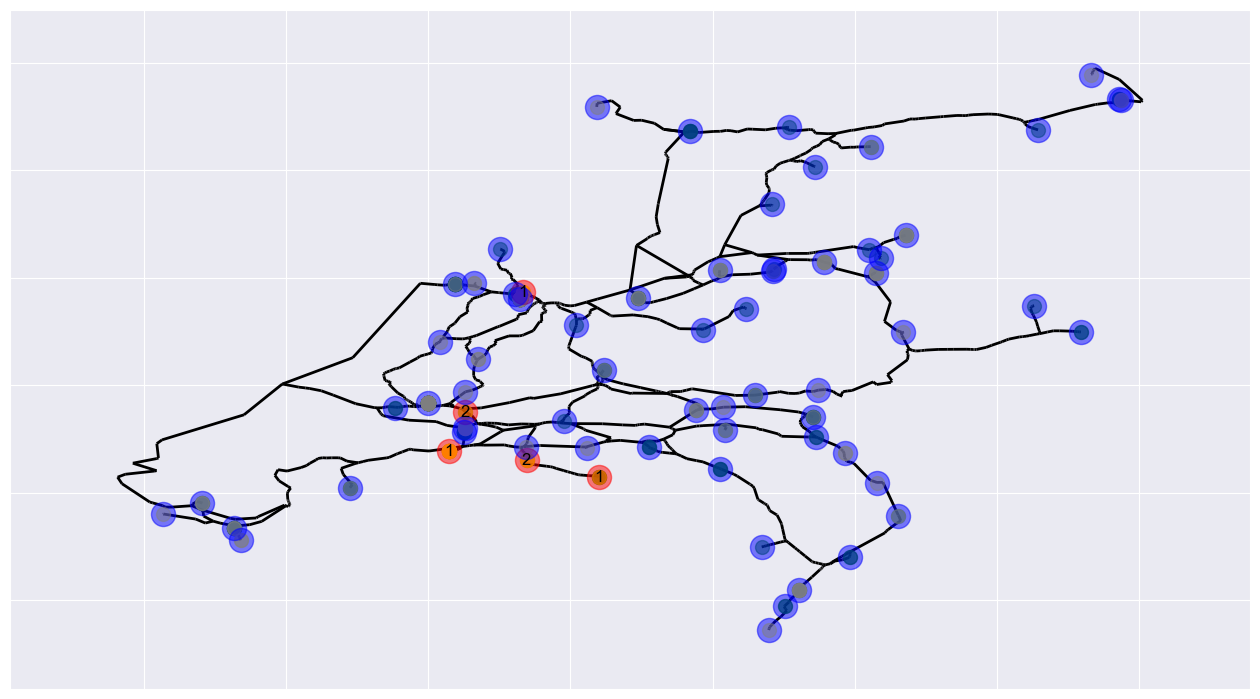

In [ ]:
visualize_placement(G, flows, optimal_facilities, df_h, paths, unused=True)

In [ ]:
break

SyntaxError: 'break' outside loop (370545404.py, line 1)

In [ ]:
# Draw network, routes and charging stations

#Define new graph H with only nodes and edges in routes

OD_list = [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)]

# OD_list = [("8864461", "8860547", 30)]#, ("8864461", "8862620", 20), ("8864461", "8860687", 10)]

# OD_list = [("8864991", "8863072", 10)]
node_list =[]
for origin, destination, flow in OD_list:
    for node in nx.dijkstra_path(G, origin, destination, weight='length_m'):
        if node not in node_list:
            node_list.append(node)

H = G.subgraph(node_list)

#create pos dict
pos_dict = {}
for node in node_list:
    pos_dict[node] = (G.nodes[node]['X'],G.nodes[node]['Y'])





other_ks =[]
fuel_stations = []

for key, number_of_stations in optimal_facilities.items():
    if number_of_stations > 0:
        fuel_stations.append(key)
    else:
        other_ks.append(key)


# x = nx.get_node_attributes(H, 'X')
# y = nx.get_node_attributes(H, 'Y')

# for key, item in x.items():
#     pos_dict[key] = (x[key],y[key])
# pos = (x,y)
    # print(pos)

# print(fuel_stations)
# H2 = H.subgraph[fuel_stations]
#
nx.draw_networkx_edges(H, pos = pos_dict)

nx.draw_networkx_nodes(G,pos_dict, fuel_stations, node_color='red')
nx.draw_networkx_nodes(G,pos_dict,other_ks, node_color='blue')
plt.show()

In [ ]:
OD_list = [("8864461", "8860547", 30), ("8864461", "8862620", 20), ("8864461", "8860687", 10)]
